# This code analyzes News Mood from last 100 tweets

In [2]:
# Import Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

In [6]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

## Examine tweet json structure

In [8]:
tweets = api.user_timeline("FoxNews", page=x)
print(tweets)

[{'created_at': 'Fri Mar 30 09:45:00 +0000 2018', 'id': 979655724304396289, 'id_str': '979655724304396289', 'text': 'Coffee needs cancer warning in California, judge rules  https://t.co/9G4uf16OYn', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/9G4uf16OYn', 'expanded_url': 'http://bit.ly/2IgmtDJ', 'display_url': 'bit.ly/2IgmtDJ', 'indices': [56, 79]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1367531, 'id_str': '1367531', 'name': 'Fox News', 'screen_name': 'FoxNews', 'location': 'U.S.A.', 'description': "America’s Strongest Primetime Lineup Anywhere! Follow America's #1 cable news network, delivering you breaking news, insightful analysis, and must-see videos.", 'url': 'http://t.co/ZYG58X

## Source Tweets

In [52]:
# Create dictionary for holding imp tweet information
tweet_dict = {
    "source": [],
    "text": [],
    "date": [],
    "compound_score": [],
    "neg_score": [],
    "pos_score": [],
    "neu_score": []
}

# source 100 tweets from each site (total 500)
for x in range(5):

    # Loop through all news sources
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)
        print (tweets)
        # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_dict["source"].append(tweet["user"]["name"])
            tweet_dict["text"].append(tweet["text"])
            tweet_dict["date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
            tweet_dict["compound_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_dict["pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_dict["neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_dict["neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

[{'created_at': 'Fri Mar 30 16:47:06 +0000 2018', 'id': 979761950979653633, 'id_str': '979761950979653633', 'text': 'Under Armour: 150 million MyFitnessPal accounts were hacked https://t.co/RVgdieUSTM', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/RVgdieUSTM', 'expanded_url': 'https://fxn.ws/2pT93pD', 'display_url': 'fxn.ws/2pT93pD', 'indices': [60, 83]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1367531, 'id_str': '1367531', 'name': 'Fox News', 'screen_name': 'FoxNews', 'location': 'U.S.A.', 'description': "America’s Strongest Primetime Lineup Anywhere! Follow America's #1 cable news network, delivering you breaking news, insightful analysis, and must-see videos.", 'url': 'http://t.co/ZYG58XZtAC', 'enti

[{'created_at': 'Fri Mar 30 16:39:51 +0000 2018', 'id': 979760126868574211, 'id_str': '979760126868574211', 'text': 'The Trump administration will require visa applicants to submit five years of social media history https://t.co/M6qbYd6Uv1', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/M6qbYd6Uv1', 'expanded_url': 'https://cnn.it/2uAUI6A', 'display_url': 'cnn.it/2uAUI6A', 'indices': [99, 122]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 759251, 'id_str': '759251', 'name': 'CNN', 'screen_name': 'CNN', 'location': '', 'description': 'It’s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK  & Download our app 📲https://t.co/Xgo5kjIt8c', 'url': 'http://

[{'created_at': 'Fri Mar 30 16:48:14 +0000 2018', 'id': 979762232602124288, 'id_str': '979762232602124288', 'text': "Parkland student David Hogg rejects Fox News host's apology https://t.co/bt9Eu2uCbB", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/bt9Eu2uCbB', 'expanded_url': 'https://bbc.in/2J8mj27', 'display_url': 'bbc.in/2J8mj27', 'indices': [60, 83]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @BBCSport", 'url': 'https://t.co/7NEgoMwJy3', 'entities': {'

[{'created_at': 'Fri Mar 30 16:41:02 +0000 2018', 'id': 979760423380635648, 'id_str': '979760423380635648', 'text': 'A 48-foot section of the "holy grail of shipwrecks" has washed ashore on a Florida beach, thrilling researchers who… https://t.co/j7lmzgOKBy', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/j7lmzgOKBy', 'expanded_url': 'https://twitter.com/i/web/status/979760423380635648', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15012486, 'id_str': '15012486', 'name': 'CBS News', 'screen_name': 'CBSNews', 'location': 'New York, NY', 'description': 'Your source for original reporting and trusted news.', 'url': 'https://t.co/VGut7r2Vg5', 'entit

[{'created_at': 'Fri Mar 30 16:48:03 +0000 2018', 'id': 979762189757186048, 'id_str': '979762189757186048', 'text': 'In college basketball, Catholic schools have long punched well above their weight. The reasons stretch back a centu… https://t.co/wJkwuvDZRS', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/wJkwuvDZRS', 'expanded_url': 'https://twitter.com/i/web/status/979762189757186048', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of our 

[{'created_at': 'Fri Mar 30 16:47:06 +0000 2018', 'id': 979761950979653633, 'id_str': '979761950979653633', 'text': 'Under Armour: 150 million MyFitnessPal accounts were hacked https://t.co/RVgdieUSTM', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/RVgdieUSTM', 'expanded_url': 'https://fxn.ws/2pT93pD', 'display_url': 'fxn.ws/2pT93pD', 'indices': [60, 83]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1367531, 'id_str': '1367531', 'name': 'Fox News', 'screen_name': 'FoxNews', 'location': 'U.S.A.', 'description': "America’s Strongest Primetime Lineup Anywhere! Follow America's #1 cable news network, delivering you breaking news, insightful analysis, and must-see videos.", 'url': 'http://t.co/ZYG58XZtAC', 'enti

[{'created_at': 'Fri Mar 30 16:39:51 +0000 2018', 'id': 979760126868574211, 'id_str': '979760126868574211', 'text': 'The Trump administration will require visa applicants to submit five years of social media history https://t.co/M6qbYd6Uv1', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/M6qbYd6Uv1', 'expanded_url': 'https://cnn.it/2uAUI6A', 'display_url': 'cnn.it/2uAUI6A', 'indices': [99, 122]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 759251, 'id_str': '759251', 'name': 'CNN', 'screen_name': 'CNN', 'location': '', 'description': 'It’s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK  & Download our app 📲https://t.co/Xgo5kjIt8c', 'url': 'http://

[{'created_at': 'Fri Mar 30 16:48:14 +0000 2018', 'id': 979762232602124288, 'id_str': '979762232602124288', 'text': "Parkland student David Hogg rejects Fox News host's apology https://t.co/bt9Eu2uCbB", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/bt9Eu2uCbB', 'expanded_url': 'https://bbc.in/2J8mj27', 'display_url': 'bbc.in/2J8mj27', 'indices': [60, 83]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @BBCSport", 'url': 'https://t.co/7NEgoMwJy3', 'entities': {'

[{'created_at': 'Fri Mar 30 16:41:02 +0000 2018', 'id': 979760423380635648, 'id_str': '979760423380635648', 'text': 'A 48-foot section of the "holy grail of shipwrecks" has washed ashore on a Florida beach, thrilling researchers who… https://t.co/j7lmzgOKBy', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/j7lmzgOKBy', 'expanded_url': 'https://twitter.com/i/web/status/979760423380635648', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15012486, 'id_str': '15012486', 'name': 'CBS News', 'screen_name': 'CBSNews', 'location': 'New York, NY', 'description': 'Your source for original reporting and trusted news.', 'url': 'https://t.co/VGut7r2Vg5', 'entit

[{'created_at': 'Fri Mar 30 16:48:03 +0000 2018', 'id': 979762189757186048, 'id_str': '979762189757186048', 'text': 'In college basketball, Catholic schools have long punched well above their weight. The reasons stretch back a centu… https://t.co/wJkwuvDZRS', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/wJkwuvDZRS', 'expanded_url': 'https://twitter.com/i/web/status/979762189757186048', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of our 

[{'created_at': 'Fri Mar 30 14:54:15 +0000 2018', 'id': 979733550856536064, 'id_str': '979733550856536064', 'text': 'Former Clinton communications director Jennifer Palmieri asked @TuckerCarlson Thursday if @HillaryClinton is "deser… https://t.co/VztU38D6io', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TuckerCarlson', 'name': 'Tucker Carlson', 'id': 22703645, 'id_str': '22703645', 'indices': [63, 77]}, {'screen_name': 'HillaryClinton', 'name': 'Hillary Clinton', 'id': 1339835893, 'id_str': '1339835893', 'indices': [90, 105]}], 'urls': [{'url': 'https://t.co/VztU38D6io', 'expanded_url': 'https://twitter.com/i/web/status/979733550856536064', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_scree

[{'created_at': 'Fri Mar 30 13:26:07 +0000 2018', 'id': 979711371091771392, 'id_str': '979711371091771392', 'text': '"She\'s only apologizing after a third of her advertisers pulled out," says Parkland survivor David Hogg, responding… https://t.co/XZ7G5mGkCx', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/XZ7G5mGkCx', 'expanded_url': 'https://twitter.com/i/web/status/979711371091771392', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 759251, 'id_str': '759251', 'name': 'CNN', 'screen_name': 'CNN', 'location': '', 'description': 'It’s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK  

[{'created_at': 'Fri Mar 30 05:49:39 +0000 2018', 'id': 979596496562728960, 'id_str': '979596496562728960', 'text': "RT @BBCNewsAsia: The former Korean Air executive who was sacked and jailed for a 'nut rage' tantrum on board a plane has made a corporate c…", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'BBCNewsAsia', 'name': 'BBC Asia', 'id': 1642135962, 'id_str': '1642135962', 'indices': [3, 15]}], 'urls': []}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @BB

[{'created_at': 'Fri Mar 30 13:38:55 +0000 2018', 'id': 979714593575591941, 'id_str': '979714593575591941', 'text': 'Next\xa0week marks 50 years\xa0since the nation was gripped by\xa0the death of Martin Luther King Jr. His death was met by a… https://t.co/uXC8t3p0PQ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/uXC8t3p0PQ', 'expanded_url': 'https://twitter.com/i/web/status/979714593575591941', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.snapstream.com" rel="nofollow">SnapStream TV Search</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15012486, 'id_str': '15012486', 'name': 'CBS News', 'screen_name': 'CBSNews', 'location': 'New York, NY', 'description': 'Your source for original reporting and trusted news.', 'url': 'https://t.

[{'created_at': 'Fri Mar 30 13:48:47 +0000 2018', 'id': 979717074892226561, 'id_str': '979717074892226561', 'text': 'RT @PatriciaMazzei: BREAKING: Jury in Salman trial has reached a verdict. It will be announced in court in about 30 minutes.', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'PatriciaMazzei', 'name': 'Patricia Mazzei', 'id': 20083388, 'id_str': '20083388', 'indices': [3, 18]}], 'urls': []}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of our journalists and more. Visit https://t.co/ghL9OoYKMM t

[{'created_at': 'Fri Mar 30 13:19:19 +0000 2018', 'id': 979709659153096704, 'id_str': '979709659153096704', 'text': 'Woman gets 5 years for illegally voting in 2016 presidential election https://t.co/96eyVkd2Wf', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/96eyVkd2Wf', 'expanded_url': 'https://fxn.ws/2pRj2vC', 'display_url': 'fxn.ws/2pRj2vC', 'indices': [70, 93]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1367531, 'id_str': '1367531', 'name': 'Fox News', 'screen_name': 'FoxNews', 'location': 'U.S.A.', 'description': "America’s Strongest Primetime Lineup Anywhere! Follow America's #1 cable news network, delivering you breaking news, insightful analysis, and must-see videos.", 'url': 'http://t.co/ZYG58XZt

[{'created_at': 'Fri Mar 30 10:22:33 +0000 2018', 'id': 979665173870006277, 'id_str': '979665173870006277', 'text': "Dining out frequently is known to increase one's intake of unhealthy sugars and fats. But a new study suggests that… https://t.co/JyuecCrFsI", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/JyuecCrFsI', 'expanded_url': 'https://twitter.com/i/web/status/979665173870006277', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 759251, 'id_str': '759251', 'name': 'CNN', 'screen_name': 'CNN', 'location': '', 'description': 'It’s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK  &

[{'created_at': 'Thu Mar 29 23:14:54 +0000 2018', 'id': 979497153235169280, 'id_str': '979497153235169280', 'text': "Alligator 'gender reveal party' causes controversy https://t.co/J9kwaxTEOK", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/J9kwaxTEOK', 'expanded_url': 'https://bbc.in/2J5idbl', 'display_url': 'bbc.in/2J5idbl', 'indices': [51, 74]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @BBCSport", 'url': 'https://t.co/7NEgoMwJy3', 'entities': {'url': {'u

[{'created_at': 'Fri Mar 30 11:16:41 +0000 2018', 'id': 979678799364349952, 'id_str': '979678799364349952', 'text': "A federal judge says adult film star Stormy Daniels' lawyer cannot depose President Trump about his client's non-di… https://t.co/5mz3QFhZsJ", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/5mz3QFhZsJ', 'expanded_url': 'https://twitter.com/i/web/status/979678799364349952', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.snapstream.com" rel="nofollow">SnapStream TV Search</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15012486, 'id_str': '15012486', 'name': 'CBS News', 'screen_name': 'CBSNews', 'location': 'New York, NY', 'description': 'Your source for original reporting and trusted news.', 'url': 'https://t.co/VGut7r

[{'created_at': 'Fri Mar 30 10:46:08 +0000 2018', 'id': 979671108478791681, 'id_str': '979671108478791681', 'text': 'The U.N. secretary general called climate change “the most systemic threat to humankind” https://t.co/bc0Bo7Ztww', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/bc0Bo7Ztww', 'expanded_url': 'https://nyti.ms/2GFlD6g', 'display_url': 'nyti.ms/2GFlD6g', 'indices': [89, 112]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of our journalists and more. Visit https://t.co/ghL9OoYKMM to share news ti

[{'created_at': 'Fri Mar 30 11:46:18 +0000 2018', 'id': 979686249261862912, 'id_str': '979686249261862912', 'text': '.@KellyannePolls: "@HillaryClinton is still talking about her and an election that happened a year and a half ago." https://t.co/R0sTSaFeIl', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'KellyannePolls', 'name': 'Kellyanne Conway', 'id': 471672239, 'id_str': '471672239', 'indices': [1, 16]}, {'screen_name': 'HillaryClinton', 'name': 'Hillary Clinton', 'id': 1339835893, 'id_str': '1339835893', 'indices': [19, 34]}], 'urls': [], 'media': [{'id': 979686116088573952, 'id_str': '979686116088573952', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/DZiLVPzXcAAUyF1.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DZiLVPzXcAAUyF1.jpg', 'url': 'https://t.co/R0sTSaFeIl', 'display_url': 'pic.twitter.com/R0sTSaFeIl', 'expanded_url': 'https://twitter.com/FoxNews/status/979686249261862912/photo/1', 'type': 'phot

[{'created_at': 'Fri Mar 30 06:09:05 +0000 2018', 'id': 979601387125428224, 'id_str': '979601387125428224', 'text': "One of India's most famous landmarks, the Taj Mahal, is planning to place a three-hour cap on visits to avoid overc… https://t.co/xXG9UwEd6z", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/xXG9UwEd6z', 'expanded_url': 'https://twitter.com/i/web/status/979601387125428224', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 759251, 'id_str': '759251', 'name': 'CNN', 'screen_name': 'CNN', 'location': '', 'description': 'It’s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK  &

[{'created_at': 'Thu Mar 29 14:19:10 +0000 2018', 'id': 979362334626975744, 'id_str': '979362334626975744', 'text': "Trump attacks Amazon for paying 'little or no taxes' https://t.co/rTHNIRQp00", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/rTHNIRQp00', 'expanded_url': 'https://bbc.in/2J3OeAh', 'display_url': 'bbc.in/2J3OeAh', 'indices': [53, 76]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @BBCSport", 'url': 'https://t.co/7NEgoMwJy3', 'entities': {'url': {

[{'created_at': 'Fri Mar 30 07:48:03 +0000 2018', 'id': 979626294198636544, 'id_str': '979626294198636544', 'text': 'Does the post office lose money on Amazon? https://t.co/Aba2MfjyoW https://t.co/Mm0kB7Dfq0', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Aba2MfjyoW', 'expanded_url': 'https://cbsn.ws/2GqRcxm', 'display_url': 'cbsn.ws/2GqRcxm', 'indices': [43, 66]}], 'media': [{'id': 979626292378300416, 'id_str': '979626292378300416', 'indices': [67, 90], 'media_url': 'http://pbs.twimg.com/media/DZhU7DHXcAAF3HD.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DZhU7DHXcAAF3HD.jpg', 'url': 'https://t.co/Mm0kB7Dfq0', 'display_url': 'pic.twitter.com/Mm0kB7Dfq0', 'expanded_url': 'https://twitter.com/CBSNews/status/979626294198636544/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1024, 'h': 538, 'resize': 'fit'}, 'medium': {'w': 1024, 'h': 538, 'resize': 'fit'}, 'sm

[{'created_at': 'Fri Mar 30 06:02:52 +0000 2018', 'id': 979599823291715584, 'id_str': '979599823291715584', 'text': 'Days after researchers announced that a tiny mummy once rumored to be an alien was actually a human infant, Chilean… https://t.co/pWHjcteuAg', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/pWHjcteuAg', 'expanded_url': 'https://twitter.com/i/web/status/979599823291715584', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'New York City', 'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of our 

In [53]:
# Store tweets in DataFrame
tweet_df = pd.DataFrame(tweet_dict, columns=["source", 
                                             "text", 
                                             "date",
                                             "compound_score",
                                             "pos_score",
                                             "neu_score",
                                             "neg_score"])

# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
tweet_df.to_csv(file_name, encoding="utf-8")

tweet_df.head()

,source,text,date,compound_score,pos_score,neu_score,neg_score
0,Fox News,Under Armour: 150 million MyFitnessPal account...,Fri Mar 30 16:47:06 +0000 2018,-0.4019,0.000,0.748,0.252
1,Fox News,".@JessicaTarlov: ""With Jeff Sessions having re...",Fri Mar 30 16:37:53 +0000 2018,0.0000,0.000,1.000,0.000
2,Fox News,"Nearly 300,000 VW diesels are sitting in lots ...",Fri Mar 30 16:33:59 +0000 2018,0.0000,0.000,1.000,0.000
3,Fox News,".@LisaMarieBoothe: ""I don't know what changed ...",Fri Mar 30 16:22:48 +0000 2018,0.3612,0.135,0.865,0.000
4,Fox News,".@davidwebbshow: ""Tell me a case where a wall ...",Fri Mar 30 16:20:13 +0000 2018,0.0000,0.000,1.000,0.000


In [54]:
# Count the total number of tweets
tweet_df.count()

source            500
text              500
date              500
compound_score    500
pos_score         500
neu_score         500
neg_score         500
dtype: int64

In [55]:
# display unique source names
tweet_df["source"].unique()

array(['Fox News', 'CNN', 'BBC News (World)', 'CBS News',
       'The New York Times'], dtype=object)

In [56]:
# Convert dates in string into datetimes
tweet_df["date"] = pd.to_datetime(tweet_df["date"])

# Sort the dataframe by date
tweet_df.sort_values("date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

# Preview the data to confirm data is sorted
tweet_df.head()

,source,text,date,compound_score,pos_score,neu_score,neg_score
0,BBC News (World),RT @bbctms: Steve Smith gives emotional media ...,2018-03-29 09:05:37,-0.2023,0.064,0.840,0.096
1,BBC News (World),"""I'll do everything I can to make up for my mi...",2018-03-29 09:13:22,-0.8271,0.000,0.661,0.339
2,BBC News (World),Sean Penn's debut novel is trashed by critics ...,2018-03-29 09:22:15,0.0258,0.200,0.609,0.191
3,BBC News (World),'Fake' India journalists held in Australia ove...,2018-03-29 09:29:39,0.0000,0.000,1.000,0.000
4,BBC News (World),"RT @BBCNews: Balls, cherries or cakes.\n \nWha...",2018-03-29 09:35:03,0.0000,0.000,1.000,0.000


## Sentiment Scatter Plot

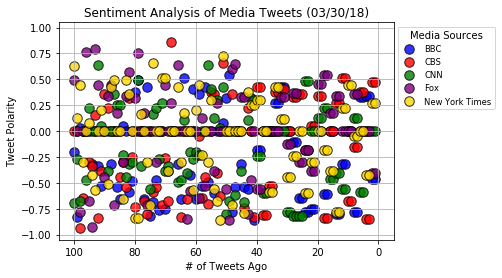

In [57]:
# Build scatter plot of tweet polarity by tweet history


plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["source"] == "BBC News (World)"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="blue", s=90,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["source"] == "CBS News"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=90,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["source"] == "CNN"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=90,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["source"] == "Fox News"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="purple", s=90,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["source"] == "The New York Times"]["compound_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=90,
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("# of Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-scatter.png"
plt.savefig(file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

## Sentiment Bar Graph

In [58]:
# Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["source"]).mean()["compound_score"]

# View the polarities
pd.DataFrame(tweet_df_polarity)

,compound_score
source,
BBC News (World),-0.207231
CBS News,-0.124344
CNN,-0.140256
Fox News,0.000322
The New York Times,-0.066715


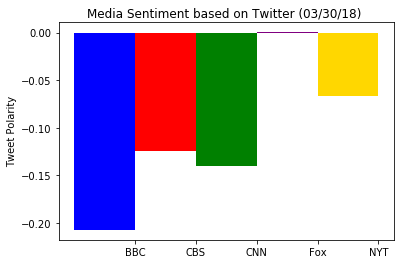

In [59]:
# Store all polarities in a tuple
tweets_polarity = (tweet_df_polarity["BBC News (World)"], 
                    tweet_df_polarity["CBS News"], 
                    tweet_df_polarity["CNN"], 
                    tweet_df_polarity["Fox News"],
                    tweet_df_polarity["The New York Times"])

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  

bbc_bar = ax.bar(ind[0], tweets_polarity[0], width, color="blue")
cbs_bar = ax.bar(ind[1], tweets_polarity[1], width, color="red")
cnn_bar = ax.bar(ind[2], tweets_polarity[2], width, color="green")
fox_bar = ax.bar(ind[3], tweets_polarity[3], width, color='purple')
nyt_bar = ax.bar(ind[4], tweets_polarity[4], width, color='gold')

# Orient widths, add labels, tick marks, etc. 
ax.set_ylabel("Tweet Polarity")
ax.set_title("Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)
ax.grid(False)

# Save plot
file_name = str(time.strftime("%m-%d-%y")) + "-barchart.png"
plt.savefig(file_name)

# Show plot
plt.show()